### Data Import and Utility Functions Setup

In [1]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Import the utility functions
from utils.metrics import kpi_ML
from utils.normalisation import normalise_data
from utils.column_info import get_column_info

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv('../data_splits/X_train.csv')
X_test = pd.read_csv('../data_splits/X_test.csv')
y_train = pd.read_csv('../data_splits/y_train.csv').values.ravel() 
y_test = pd.read_csv('../data_splits/y_test.csv').values.ravel()

### Inspection

In [3]:
print("Information about X_train")
get_column_info(X_train)

Information about X_train


,Column,Unique Values,Data Type,Missing Values,Example Values
0,Store,45,int64,0,"[15, 30, 6, 21, 24]"
1,Dept,81,int64,0,"[3, 25, 27, 49, 55]"
2,IsHoliday,2,int64,0,"[0, 1]"
3,Type,3,int64,0,"[2, 1, 3]"
4,Size,40,int64,0,"[123737, 42988, 202505, 140167, 203819]"
5,Temperature,3528,float64,0,"[30.34, 83.51, 79.44, 48.72, 32.86]"
6,Fuel_Price,892,float64,0,"[3.811, 2.668, 2.705, 3.172, 3.585]"
7,MarkDown1,2277,float64,0,"[5347.45, 3389.1, 7325.68, 3735.3, 699.48]"
8,MarkDown2,1499,float64,0,"[192.0, 43.0, 25367.9, -265.76, 5524.49]"
9,MarkDown3,1662,float64,0,"[24.6, 1258.32, 203.51, 52.82, 12.39]"


In [4]:
print("Information about X_test")
get_column_info(X_test)

Information about X_test


,Column,Unique Values,Data Type,Missing Values,Example Values
0,Store,45,int64,0,"[28, 18, 38, 29, 13]"
1,Dept,81,int64,0,"[40, 93, 4, 33, 52]"
2,IsHoliday,2,int64,0,"[0, 1]"
3,Type,3,int64,0,"[3, 2, 1]"
4,Size,40,int64,0,"[206302, 120653, 39690, 93638, 219622]"
5,Temperature,3528,float64,0,"[50.43, 38.1, 76.67, 43.43, 45.12]"
6,Fuel_Price,892,float64,0,"[3.599, 3.876, 4.087, 2.805, 2.841]"
7,MarkDown1,2277,float64,0,"[5155.86, 7410.18, 5347.45, 2936.01, 4894.97]"
8,MarkDown2,1499,float64,0,"[19549.51, 368.19, 192.0, 336.39, 230.0]"
9,MarkDown3,1662,float64,0,"[218.29, 25.46, 24.6, 26.18, 19.39]"


**Note:** Although we have already conducted preprocessing, it is important to double-check that the information is robust and provides a solid foundation for developing a Random Forest regression model. With no missing values and a clear understanding of the unique values and data types, we are well-prepared to proceed with model development.

## Random Forest Regressor Model Development

We will follow a structured approach to systematically enhance the performance of the RandomForestRegressor models and ensure a robust evaluation of their capabilities.

#### Random Forest Regressor Model Development

1. **_Simple Random Forest Regressor_**
   - **_Train a basic Random Forest Regressor model._**
   - **_Evaluate its performance on the test dataset._**

2. **Tuned Random Forest Regressor**
   - Perform hyperparameter tuning to optimise the Random Forest model.
   - Evaluate the tuned model's performance.

3. **Polynomial Features with Random Forest and GridSearchCV**
   - Use Polynomial Features to capture non-linear relationships.
   - Implement GridSearchCV to find the best combination of hyperparameters.

4. **Random Forest with PCA**
   - Apply Principal Component Analysis (PCA) to reduce dimensionality.
   - Train a Random Forest Regressor on the transformed features.
   - Evaluate its performance on the test dataset.

### 1. Train a Basic Random Forest Regressor Model

In [6]:
rf = RandomForestRegressor(random_state=42)

start_time_rf1 = time.time()
rf.fit(X_train, y_train)
training_time_rf1 = (time.time() - start_time_rf1)/60

#### Evaluate Its Performance on the Test Dataset

In [7]:
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

metrics_simple_rf = kpi_ML(y_train, Y_train_pred, y_test, Y_test_pred, "Simple Random Forest Regressor")
metrics_simple_rf['Training Time rf1 (min)'] = round(training_time_rf1,1)

print(metrics_simple_rf)

                                MAE  RMSE  Bias   R²  Training Time rf1 (min)
Simple Random Forest Regressor                                               
Train                           3.3   8.5  -0.1  1.0                      3.0
Test                            9.1  23.2  -0.1  1.0                      3.0


**Note:** The errors (MAE and RMSE) are relatively low on the training set but higher on the test set, indicating potential overfitting. We will address this issue in the next model by tuning the hyperparameters using RandomizedSearchCV to improve generalisation, and by employing cross-validation to ensure the model's robustness.

#### Save the results

In [8]:
results_dir = '../model_metrics/statistical_models'
results_path = os.path.join(results_dir, 'results_simple_rf.csv')
metrics_simple_rf.to_csv(results_path, index=False)
print("Simple Random Forest results saved.")

Simple Random Forest results saved.


#### Print Feature Importances

In [9]:
feature_importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
         Feature  Importance
1           Dept    0.625070
4           Size    0.191838
0          Store    0.056980
14          Week    0.047132
12           CPI    0.026543
3           Type    0.014446
13  Unemployment    0.010895
5    Temperature    0.010300
6     Fuel_Price    0.004914
9      MarkDown3    0.003983
10     MarkDown4    0.002038
7      MarkDown1    0.001545
11     MarkDown5    0.001435
8      MarkDown2    0.001291
2      IsHoliday    0.001220
15          Year    0.000370


#### Plot Feature Importances


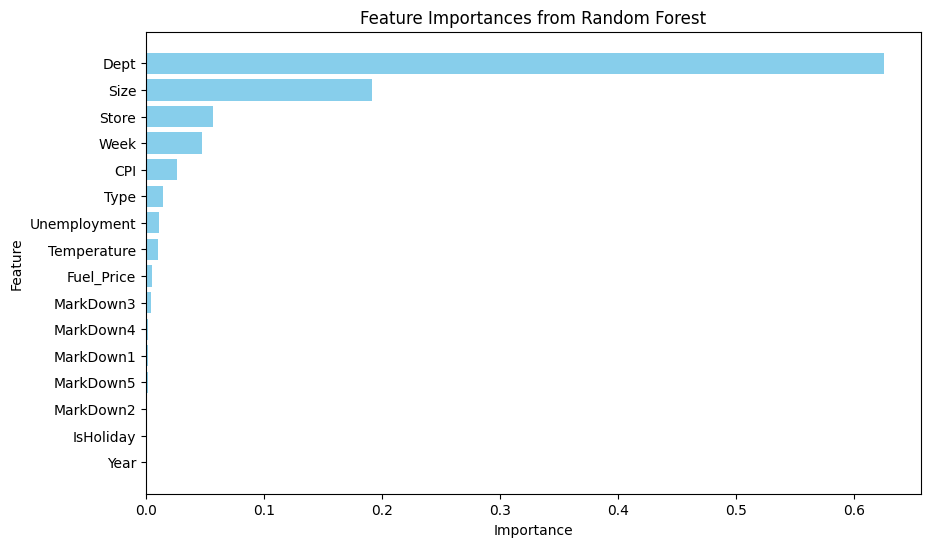

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.savefig('../model_metrics/statistical_models/Feature_Importances_from_Random_Forest_rf.png', bbox_inches='tight')
plt.show()